# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 2. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 2 &mdash; 40 баллов.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 80 баллов;
* Задача 4 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [2]:
# Bot check

# HW_ID: fpmi_ad4_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [112]:
from modulefinder import Module
from typing import Tuple
import numpy as np
from sklearn import datasets

from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset

sns.set(palette="Set2")
cm_bright = ListedColormap(["#FF3300", "#00CC66"])

В условии задания обозначены области, в которых запрещено использование ИИ-инструментов. Это не исчерпывающий список. Подробные правила можно найти <a href="https://thetahat.ru/courses/ai-rules">по ссылке на сайте</a>. В частности, запрещено применять ИИ-инструменты при решении теоретических частей задач, ответах на вопросы и написании выводов.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 2.

**При решении задачи запрещено пользоваться ИИ-инструментами,** но можно при оформлении решения.

Рассмотрим двухслойную полносвязную нейронную сеть, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0, 1\}$
$$y_\theta(x) = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big),$$
где 
* $W_1 \in \mathbb{R}^{d \times h}, b_1 \in \mathbb{R}^{h}$ &mdash; параметры 1-го слоя,
* $W_2 \in \mathbb{R}^{h \times 1}, b_2 \in \mathbb{R}$ &mdash; параметры 2-го слоя,
* $\theta = (W_1, b_1, W_2, b_2)$ — все параметры нейросети,
* $\sigma_1(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ &mdash; гиперболический тангенс, функция активации 1-го слоя, применяется поэлементно,
* $\sigma_2(x) = \frac{1}{1 + e^{-x}}$ &mdash; логистическая сигмоида, функция активации 2-го слоя.

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

*Для вставки изображения скопируйте его и вставьте в ячейку markdown с помощью `Ctrl+V`. Должно появится либо большое количество символов (Colab), либо что-то вроде `![image.png](attachment:image.png)`.*

![Примерное представление нейросети.](photo_2025-03-24_13-12-10.jpg)

**2.** Дана обучающая выборка $X \in \mathbb{R}^{n \times d}$ — матрица входных данных и $Y \in \{0, 1\}^{n}$ — таргет. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $\mathscr{L}$, в данном случае рассмотрим кросс энтропию
$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big).$$

Наша цель — определить оптимальные параметры нашей модели, минимизируя функцию $\mathscr{L}(\theta)$ на заданном наборе данных. Мы будем решать эту задачу с помощью метода градиентного спуска, который требует вычисления производных по всем параметрам сети. Конечно, в данном случае несложно выписать все производные напрямую, с чем каждый из вас легко сможет справиться.

Однако прямое вычисление производных имеет квадратичную зависимость от количества параметров, что делает его неэффективным. Из-за этого мы не смогли бы быстро обучать глубокие нейронные сети. Хотя в данном случае речь идёт всего лишь о двух слоях, понимание работы методов на простых примерах было бы полезно.

На лекции был рассказан метод **обратного распространения ошибки (back propagation)** и показан его пример для двухслойной нейронной сети (на доске). Выпишите все необходимые производные для применения метода back propagation.

Для одного обучающего примера $(x, y)$ рассмотрим нейронную сеть
$$
y_\theta(x) = \sigma_2\Bigl( \sigma_1\bigl( x^\top W_1 + b_1 \bigr) W_2 + b_2 \Bigr),
$$
где 
$$
\sigma_1(z) = \tanh(z), \quad \sigma_2(z) = \frac{1}{1+e^{-z}}.
$$

Пусть
$$
z^{(1)} = x^\top W_1 + b_1, \quad a^{(1)} = \tanh\bigl(z^{(1)}\bigr),
$$
$$
z^{(2)} = a^{(1)\top} W_2 + b_2, \quad \hat{y} = \sigma_2\bigl(z^{(2)}\bigr) = \frac{1}{1+e^{-z^{(2)}}}.
$$

Функция потерь (кросс-энтропия) для одного примера:
$$
\mathscr{L}(y, \hat{y}) = -\Bigl[ y\log\hat{y} + (1-y)\log(1-\hat{y}) \Bigr].
$$

**Вывод необходимых производных:**

1. Производная функции потерь по выходу нейрона:
$$
\frac{\partial \mathscr{L}}{\partial z^{(2)}} = \hat{y} - y.
$$

2. Градиенты для параметров второго слоя:
$$
\frac{\partial \mathscr{L}}{\partial W_2} = \left(\hat{y} - y\right) \, a^{(1)},
$$
$$
\frac{\partial \mathscr{L}}{\partial b_2} = \hat{y} - y.
$$

3. Распространение ошибки на скрытый слой:
Сначала вычисляем производную по выходу скрытого слоя:
$$
\frac{\partial \mathscr{L}}{\partial a^{(1)}} = W_2 \, \left(\hat{y} - y\right).
$$
Учитывая, что для функции $\tanh(z)$ справедлива формула
$$
\frac{d}{dz}\tanh(z) = 1 - \tanh^2(z),
$$
получаем:
$$
\frac{\partial \mathscr{L}}{\partial z^{(1)}} = \frac{\partial \mathscr{L}}{\partial a^{(1)}} \odot \left(1 - \bigl(a^{(1)}\bigr)^2\right)
= W_2 \, \left(\hat{y} - y\right) \odot \left(1 - \bigl(a^{(1)}\bigr)^2\right),
$$
где $\odot$ означает покомпонентное умножение.

4. Градиенты для параметров первого слоя:
$$
\frac{\partial \mathscr{L}}{\partial W_1} = \frac{\partial \mathscr{L}}{\partial z^{(1)}} \, x^\top,
$$
$$
\frac{\partial \mathscr{L}}{\partial b_1} = \frac{\partial \mathscr{L}}{\partial z^{(1)}}.
$$

**3.** Выпишите итоговый алгоритм обратного распространения ошибки для данной нейросети. Нужно записать все необходимые вычисления, включая все итоговые формулы производных. Подробно поясните, почему он имеет линейную сложность.

Ниже приведён итоговый алгоритм обратного распространения ошибки для двухслойной полносвязной нейронной сети, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0,1\}$ по следующей схеме:
$$
y_\theta(x) = \sigma_2\Bigl( \sigma_1\bigl( x^\top W_1 + b_1 \bigr) W_2 + b_2 \Bigr),
$$
где
$$
\sigma_1(z) = \tanh(z) \quad\text{и}\quad \sigma_2(z) = \frac{1}{1+e^{-z}}.
$$

**Прямой проход (Forward Pass):**

1. Вычисляем выход скрытого слоя:
$$
z^{(1)} = x^\top W_1 + b_1,\quad a^{(1)} = \tanh\bigl(z^{(1)}\bigr).
$$

2. Вычисляем выход сети:
$$
z^{(2)} = a^{(1)\top} W_2 + b_2,\quad \hat{y} = \sigma_2\bigl(z^{(2)}\bigr) = \frac{1}{1+e^{-z^{(2)}}}.
$$

3. Функция потерь (кросс-энтропия) для одного примера:
$$
\mathscr{L}(y,\hat{y}) = -\Bigl[ y\log\hat{y} + (1-y)\log(1-\hat{y}) \Bigr].
$$

**Обратный проход (Backward Pass):**

Для каждого примера $(x,y)$:

- На выходном слое:
  $$
  \delta^{(2)} = \frac{\partial \mathscr{L}}{\partial z^{(2)}} = \hat{y} - y.
  $$
  
  Градиенты по параметрам второго слоя:
  $$
  \frac{\partial \mathscr{L}}{\partial W_2} = \delta^{(2)}\,a^{(1)},
  $$
  $$
  \frac{\partial \mathscr{L}}{\partial b_2} = \delta^{(2)}.
  $$

- На скрытом слое:
  
  Сначала распространяем ошибку:
  $$
  \frac{\partial \mathscr{L}}{\partial a^{(1)}} = W_2\,\delta^{(2)}.
  $$
  
  Учитывая, что для функции $\tanh(z)$
  $$
  \frac{d}{dz}\tanh(z) = 1-\tanh^2(z),
  $$
  получаем:
  $$
  \delta^{(1)} = \frac{\partial \mathscr{L}}{\partial z^{(1)}} = \left(W_2\,\delta^{(2)}\right) \odot \Bigl(1-\bigl(a^{(1)}\bigr)^2\Bigr),
  $$
  где $\odot$ означает покомпонентное умножение.

  Градиенты по параметрам первого слоя:
  $$
  \frac{\partial \mathscr{L}}{\partial W_1} = \delta^{(1)}\,x^\top,
  $$
  $$
  \frac{\partial \mathscr{L}}{\partial b_1} = \delta^{(1)}.
  $$

**Обновление параметров (Gradient Descent):**

При использовании шага обучения $\eta$ параметры обновляются по следующим формулам:
$$
W_2 \leftarrow W_2 - \eta\,\frac{\partial \mathscr{L}}{\partial W_2}, \quad b_2 \leftarrow b_2 - \eta\,\frac{\partial \mathscr{L}}{\partial b_2},
$$
$$
W_1 \leftarrow W_1 - \eta\,\frac{\partial \mathscr{L}}{\partial W_1}, \quad b_1 \leftarrow b_1 - \eta\,\frac{\partial \mathscr{L}}{\partial b_1}.
$$

При обучении на выборке из $n$ примеров суммирование (или усреднение) производится по индексам $i=1,\dots,n$.

**Почему алгоритм имеет линейную сложность?**

Все операции в прямом и обратном проходе (матричное умножение, вычисление активаций, покомпонентные операции) выполняются за время, пропорциональное числу параметров и примеров. Нет вложенных циклов по параметрам; каждое вычисление производится один раз для каждого примера. Таким образом, общая вычислительная сложность составляет $O(n\cdot p)$, где $p$ – общее число параметров, что является линейной зависимостью от размеров данных и модели.


**Выводы:**

Благодаря алгоритму обратного распространения ошибки, нейронные сети могут эффективно обучаться, а значит, и иметь право на существование. Знание выходов скрытых и выходного слоев, позволяет нам вычислять градиент при обратном проходе. 

**Внимание!** Решение, которое будет иметь сверхлинейную сложность, не будет оценено совсем. Считать производные вы все умеете, задача — вычислять их эффективно алгоритмически.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

**1.** На практике, чтобы сделать численные вычисления градиентов более стабильными, в качестве функции ошибки используют композицию бинарной кроссэнтропии и сигмоиды, передавая ей логиты в качестве аргументов, то есть выходы последнего линейного слоя. Выведите итоговую формулу градиента бинарной кроссэнтропии по выходу сети до применения сигмоиды.

Пусть \(z\) — выход последнего линейного слоя (логиты), а 
$$
\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}
$$
— выход сети после применения сигмоиды. Функция ошибки (бинарная кроссэнтропия) выглядит так:
$$
\mathscr{L}(y,\hat{y}) = -\Bigl[ y\ln\hat{y} + (1-y)\ln(1-\hat{y}) \Bigr].
$$
Чтобы вычислить градиент по \(z\), применим правило цепочки. Производная по \(\hat{y}\):
$$
\frac{\partial \mathscr{L}}{\partial \hat{y}} = -\left(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}\right).
$$
При этом производная сигмоиды равна:
$$
\frac{d\hat{y}}{dz} = \hat{y}(1-\hat{y}).
$$
Таким образом, по правилу цепочки:
$$
\frac{\partial \mathscr{L}}{\partial z} = \frac{\partial \mathscr{L}}{\partial \hat{y}} \cdot \frac{d\hat{y}}{dz} 
= -\left(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}\right) \hat{y}(1-\hat{y}).
$$
После приведения подобных получаем:
$$
\frac{\partial \mathscr{L}}{\partial z} = \hat{y} - y.
$$
Таким образом, итоговая формула градиента бинарной кроссэнтропии по логитам имеет вид:
$$
\boxed{\frac{\partial \mathscr{L}}{\partial z} = \sigma(z) - y.}
$$


**2.** Реализуйте класс обучения нейронной сети из задачи 2 в sklearn-стиле, используя только библиотеку `numpy`. Используйте представленный ниже шаблон.

**Особенности:**
* Функция `_backward` должна реализовывать метод back propagation полностью на основе формул из задачи 2. Функция должна *накапливать* градиенты, подробнее см. <a href="https://thetahat.ru/courses/ad/main/4/nn_simple_examples">ноутбук с занятия по нейросетям</a>.
* При реализации функции `_backward` необходимо сразу посчитать производную функции ошибку по выходу сети до применения функции активации, что в коде реализуется функцией `output_gradient`. Это необходимо для повышения стабильности численных вычислений, что также используется в PyTorch. 
* Желательно, чтобы градиент не зависел от размера входных данных, поэтому при вычислении градиентов по параметрам, рекомендуется разделить их на размер батча.
* При необходимости вы можете менять внутреннюю структуру методов, кроме методов `__init__`, `fit`, `predict`, `predict_proba`. В случае изменений исправляйте также документацию и типизацию аргументов, иначе оценка может быть снижена.
* **При реализации класса запрещено пользоваться ИИ-инструментами.** За исключением случаев обновления документации класса при необходимости.

In [74]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class TwoLayersNNClassifier:
    """Двухслойная нейронная сеть для задачи бинарной классификации.

    Параметры:
        input_size (int): Размер входного вектора.
        hidden_size (int): Количество нейронов в скрытом слое.
        learning_rate (float, optional): Скорость обучения (по умолчанию 0.01).
        n_epoch (int, optional): Количество эпох обучения (по умолчанию 100).
        weight_init_scale (float, optional): Масштаб для инициализации весов (по умолчанию 1).
    """

    def __init__(
            self,
            input_size: int,
            hidden_size: int,
            learning_rate: float = 0.01,
            n_epoch: int = 100,
            weight_init_scale: float = 1,
    ):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale

        # Инициализация весов
        self._initialize_weights()

        # Инициализация градиентов
        self._zero_grad()

        # Для хранения истории потерь
        self.loss_history = []

    def _initialize_weights(self):
        """Инициализирует веса сети случайными значениями."""
        self.W1 = self._init_weight_matrix(self.input_size, self.hidden_size)
        self.b1 = self._init_weight_matrix(1, self.hidden_size)
        self.W2 = self._init_weight_matrix(self.hidden_size, 1)
        self.b2 = self._init_weight_matrix(1, 1)

    def _init_weight_matrix(self, rows: int, cols: int) -> np.ndarray:
        """Инициализирует матрицу весов случайными значениями.

        Параметры:
            rows (int): Количество строк.
            cols (int): Количество столбцов.

        Возвращает:
            np.ndarray: Матрица весов.
        """
        return (np.random.rand(rows, cols) * 2 - 1) * self.weight_init_scale

    @staticmethod
    def tanh_derivative(x: np.ndarray) -> np.ndarray:
        """Вычисляет производную функции гиперболического тангенса.

        Параметры:
            x (np.ndarray): Входной массив.

        Возвращает:
            np.ndarray: Производная функции tanh.
        """
        return 1 - np.power(np.tanh(x), 2)

    @staticmethod
    def sigmoid(x: np.ndarray, scale: int = 1000) -> np.ndarray:
        """Вычисляет логистическую сигмоиду.

        Параметры:
            x (np.ndarray): Входной массив.
            scale (int, optional): Максимальное абсолютное значение для ограничения (по умолчанию 1000).

        Возвращает:
            np.ndarray: Значения сигмоиды.
        """
        x = np.clip(x, -scale, scale)  # Ограничиваем значения
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def binary_crossentropy(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """
        Вычисляет значение бинарной кросс-энтропии в стабильной форме.
    
        Параметры:
            y_pred (np.ndarray): Предсказанные логиты.
            y_true (np.ndarray): Истинные значения (0 или 1).
    
        Возвращает:
            float: Среднее значение бинарной кросс-энтропии.
        """
        loss_vector = np.logaddexp(0, -y_pred) + (1 - y_true) * y_pred
        return np.mean(loss_vector)

    @staticmethod
    def output_gradient(logits: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет градиент по выходу сети до применения сигмоиды.

        Параметры:
            logits (np.ndarray): Предсказанные значения.
            y (np.ndarray): Истинные значения.

        Возвращает:
            np.ndarray: Градиент по выходу до применения сигмоиды.
        """
        return TwoLayersNNClassifier.sigmoid(logits) - y

    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Выполняет прямой проход по сети.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Выход сети (вероятности).
        """
        self.layer_one = np.tanh(np.dot(X, self.W1) + self.b1)
        self.logits = np.dot(self.layer_one, self.W2) + self.b2
        self.y_pred = TwoLayersNNClassifier.sigmoid(self.logits)
        return self.y_pred

    def _backward(self, X: np.ndarray, y: np.ndarray):
        """Выполняет обратный проход (backpropagation), накапливает градиенты.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения.
        """

        # Градиент по выходу после применения сигмоиды
        ds2 = self.y_pred - y
        # Градиент по параметрам 2-го слоя
        self.dW2 += self.layer_one.T @ ds2
        self.db2 += np.sum(ds2, axis=0, keepdims=True)

        # Градиент по выходу скрытого слоя
        ds1 = (ds2 @ self.W2.T) * (1 - np.square(self.layer_one))

        # Градиент по параметрам 1-го слоя
        self.dW1 += X.T @ ds1
        self.db1 += np.sum(ds1, axis=0, keepdims=True)

    def _step(self):
        """Обновляет веса сети на основе вычисленных градиентов."""
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def _zero_grad(self):
        """Обнуляет градиенты перед следующим шагом обучения."""
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def _show_progress(self, epoch: int, plot_freq: int):
        """Выводит прогресс обучения на каждой итерации.

        Параметры:
            epoch (int): Номер текущей эпохи.
            plot_freq (int): Частота отрисовки графика.
        """
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"

        if plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            print(info_text)

        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Номер эпохи")
            plt.ylabel("Лосс")
            plt.title(info_text)
            plt.show()

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, plot_freq: int = 0):
        """Обучает модель на предоставленных данных.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения (0 или 1).
            verbose (bool, optional): Если True, выводит прогресс обучения (по умолчанию True).
            plot_freq (int, optional): Частота отрисовки графика.
                    Если 0, график не рисуется (по умолчанию 0).
        """
        y = y[:, None]
        self.loss_history = []  # Очистка истории потерь перед обучением

        for epoch in range(self.n_epoch):
            # Прямой проход по сети
            y_pred = self._forward(X)
            loss = self.binary_crossentropy(self.logits, y)
            self.loss_history.append(loss)  # Сохраняем значение потерь

            # Допишите шаги обучения
            self._backward(X, y)
            self._step()
            self._zero_grad()

            if verbose:
                self._show_progress(epoch, plot_freq)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказывает классы для входных данных.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Предсказанные классы (0 или 1).
        """
        y_pred = self._forward(X)
        return (y_pred > 0.5).astype(int)  # Порог 0.5 для бинарной классификации

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности принадлежности к классам 0 и 1.

        Параметры:
        X (np.ndarray): Входные данные.

        Возвращает:
        np.ndarray: Матрица вероятностей формы (n, 2), где n — количество объектов.
                   Первый столбец — вероятность класса 0, второй — класса 1.
        """
        self._forward(X)
        prob_class_1 = self.y_pred  # Вероятность класса 1
        prob_class_0 = 1 - self.y_pred  # Вероятность класса 0
        return np.hstack((prob_class_0, prob_class_1))  # Объединяем в матрицу (n, 2)

**3.** Сгенерируем искусственные данные

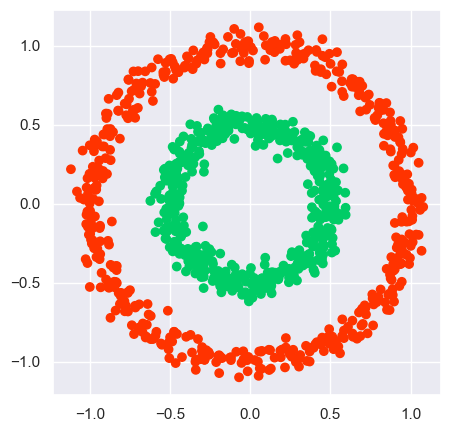

In [82]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Обучите реализованную ранее нейросеть решать задачу классификации на основе этой выборки.

*Периодически во время обучения рисуйте график лосса. Если он возрастает, стоит поискать ошибку.*

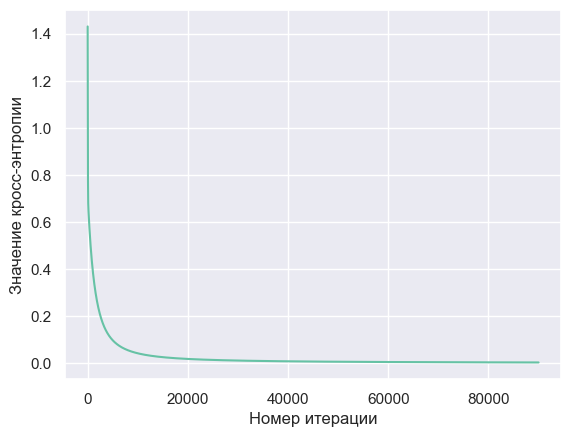

In [83]:
model = TwoLayersNNClassifier(2, 100, learning_rate=1e-5, n_epoch=90000)
model.fit(X, y, False)
plt.plot(model.loss_history)
plt.ylabel("Значение кросс-энтропии")
plt.xlabel("Номер итерации");

С помощью функции `np.meshgrid` создайте двухмерную сетку в диапазоне $[-1.5, 1.5]$ по каждой координате с шагом не более $0.02$. Для каждой точки сетки посчитайте оценки вероятностей принадлежности тому или иному классу. 

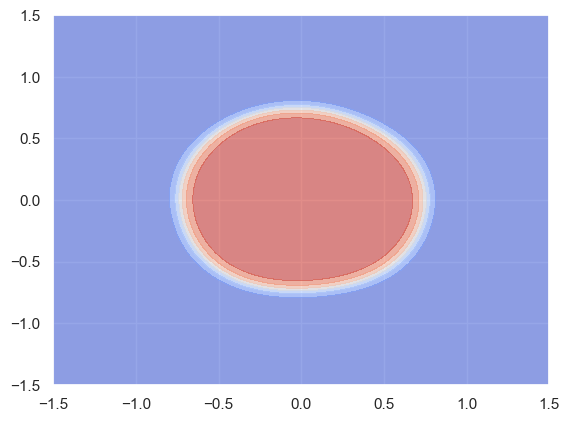

In [84]:
x_grid, y_grid = np.meshgrid(np.linspace(-1.5, 1.5, 2000), np.linspace(-1.5, 1.5, 2000))
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]
z = model.predict_proba(grid_points)[:, 1].reshape(x_grid.shape)
plt.contourf(x_grid, y_grid, z, cmap='coolwarm', alpha=0.6);

Визуализируйте полученные предсказания классов и вероятностей.

*Если у вас получилось плохое качество, попробуйте увеличить количество нейронов. Если не помогает, возможно, где-то ошибка.*

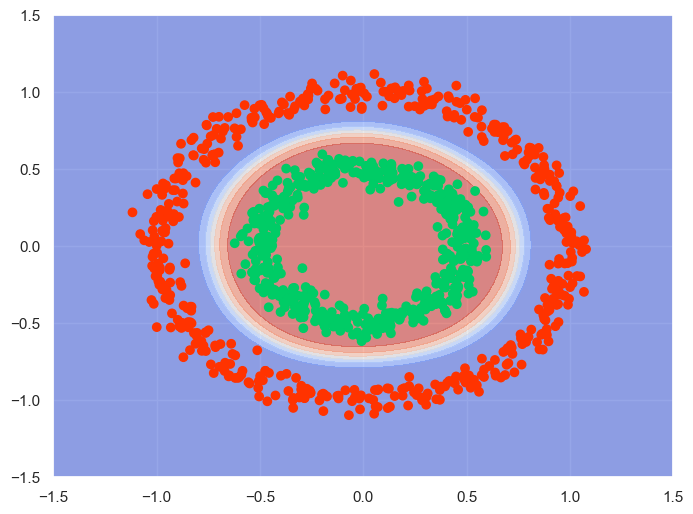

In [85]:
plt.figure(figsize=(8, 6))

# Отображаем контуры с цветами
plt.contourf(x_grid, y_grid, z, cmap='coolwarm', alpha=0.6)

# Добавляем scatter с точками
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show();

Немного увеличим разброс данных

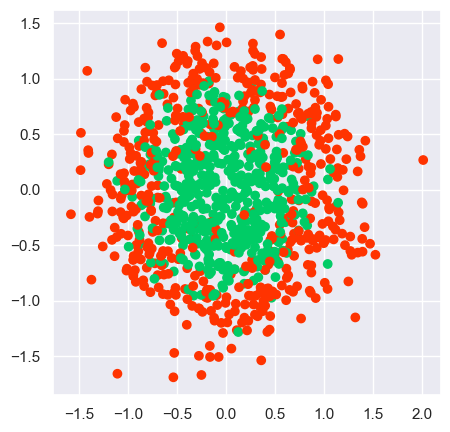

In [86]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.25)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Повторите те же действия с новыми данными.

In [10]:
model = TwoLayersNNClassifier(2, 100, learning_rate=1e-5, n_epoch=30000)
model.fit(X, y, False)

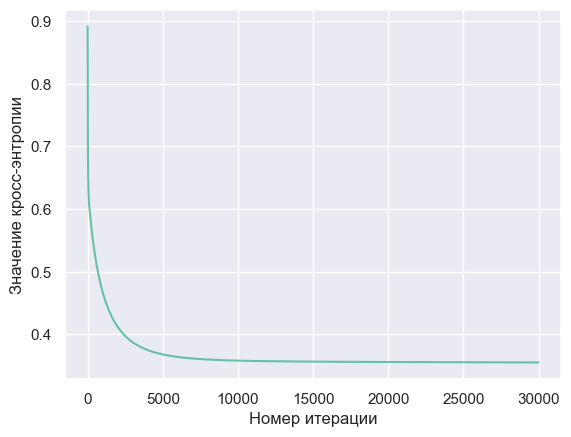

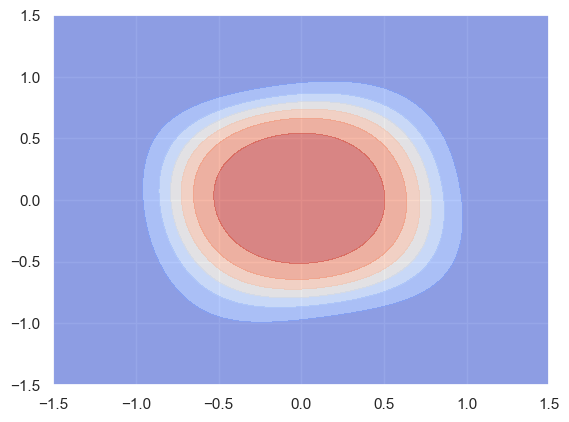

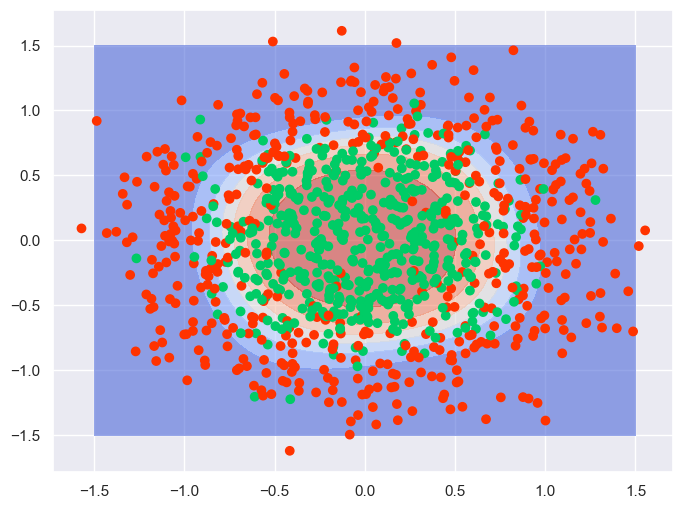

In [11]:
plt.plot(model.loss_history)
plt.ylabel("Значение кросс-энтропии")
plt.xlabel("Номер итерации")
plt.show()

x_grid, y_grid = np.meshgrid(np.linspace(-1.5, 1.5, 2000), np.linspace(-1.5, 1.5, 2000))
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]
z = model.predict_proba(grid_points)[:, 1].reshape(x_grid.shape)
plt.contourf(x_grid, y_grid, z, cmap='coolwarm', alpha=0.6)
plt.show()

plt.figure(figsize=(8, 6))

plt.contourf(x_grid, y_grid, z, cmap='coolwarm', alpha=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show();

**Выводы:**

На первом датасете модели удалось отлично предсказать закономерность. Края почти не размыты, грубо говоря, модель почти всегда предсказывает, либо один, либо ноль, с почти стопроцентной уверенностью.

На втором датасете, из-за большого шума не удается предсказать всё, но модели удалось выявить закономерность: точки в центре она предсказывает очень уверенно, на краях менее уверенно: ровно как и должно быть.

Видно, что граница предсказаний на датасетах отличается: чем более размыта природа распределения, тем более консервативно модель предсказывает вероятности.
Так или иначе, лосс в обеих моделях околонулевой, но переобучения нет.

**4.** Теперь давайте применим нашу нейронную сеть к данным MNIST.

Загрузите данные. Для этого воспользуйтесь кодом из задачи 1. Обратите внимание, что поскольку наша сеть реализована на `numpy` и принимает `numpy`-матрицы, потребуется предварительно перевести `torch`-тензоры в `numpy`-массивы.

Поскольку наша сеть была разработана для бинарной классификации, мы будем рассматривать изображения, на которых представлены только две цифры: `0` и `1`. Возьмите по 1000 изображений каждого символа и преобразуйте их в векторы. Также выделите изображения из тестовой выборки, соответствующие этим цифрам.

In [12]:
def load_mnist(
        train_size: int = 6000, target_size: int = 14
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    """Загружает и подготавливает данные MNIST для обучения и тестирования.

    Параметры:
    train_size (int): Количество обучаемых данных. По умолчанию 6000.
    target_size (int): Размер, до которого уменьшаются изображения. По умолчанию 14.

    Возвращает:
    train_images (torch.Tensor): Тензор с изображениями для обучения.
    train_labels (torch.Tensor): Тензор с метками для обучения.
    test_images (torch.Tensor): Тензор с изображениями для тестирования.
    test_labels (torch.Tensor): Тензор с метками для тестирования.

    Данные загружаются из набора MNIST, нормализуются, уменьшаются в
    размере и преобразуются в векторы. Для обучения используется только
    часть (train_fraction) от исходного набора данных.
    """

    PIXEL_MAX_VALUE = 255.0  # Для нормализации значений пикселей

    # Создаем преобразование для данных: конвертируем изображения в тензоры PyTorch
    transform = transforms.Compose(
        [
            # Преобразует изображение в тензор и нормализует значения в диапазоне [0, 1]
            transforms.ToTensor(),
        ]
    )

    # Загружаем обучающий и тестовый наборы данных MNIST
    train_dataset = MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = MNIST(root="./data", train=False, transform=transform, download=True)

    # Выбираем часть обучающего набора данных
    train_indices = np.random.choice(len(train_dataset), train_size, replace=False)

    # Преобразуем изображения в тензоры и нормализуем их, деля на PIXEL_MAX_VALUE
    train_images = train_dataset.data[train_indices].unsqueeze(1).float() / PIXEL_MAX_VALUE
    test_images = test_dataset.data.unsqueeze(1).float() / PIXEL_MAX_VALUE

    # Уменьшаем размер изображений до target_size x target_size с использованием билинейной интерполяции
    train_images = torch.nn.functional.interpolate(
        train_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )
    test_images = torch.nn.functional.interpolate(
        test_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )

    # Преобразуем изображения в векторы (разворачиваем в одномерные массивы)
    train_images = train_images.view(train_size, -1)
    test_images = test_images.view(len(test_dataset), -1)

    # Получаем метки для выбранных обучающих и всех тестовых данных
    train_labels = train_dataset.targets[train_indices]
    test_labels = test_dataset.targets

    return train_images, train_labels, test_images, test_labels

In [179]:
train_images, train_labels, test_images, test_labels = load_mnist(target_size=28)
train_images, train_labels, test_images, test_labels = train_images.detach().numpy(), train_labels.detach().numpy(), test_images.detach().numpy(), test_labels.detach().numpy()

In [181]:
idxs = np.where(np.isin(test_labels, (0, 1)))
test_labels = test_labels[idxs]
test_images = test_images[idxs]
idxs = np.where(np.isin(train_labels, (0, 1)))
train_images = train_images[idxs]
train_labels = train_labels[idxs]   

Обучите реализованную ранее нейронную сеть к этим данным.


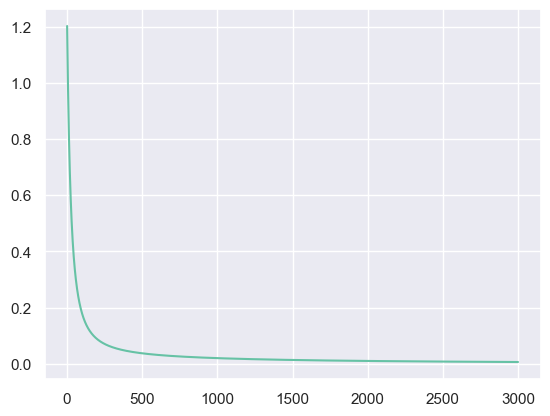

In [182]:
model = TwoLayersNNClassifier(28**2, 60, learning_rate=1e-5, n_epoch=3000)
model.fit(train_images, train_labels, verbose=False)
plt.plot(model.loss_history);

Посчитайте качество обученной нейросети на тестовой выборке. Можете ли вы сказать, насколько хорошо сеть обучилась?

In [183]:
y_pred = model.predict(test_images)
print(f"Качество на тестовой выборке: {accuracy_score(y_pred, test_labels)}")

Качество на тестовой выборке: 0.9971631205673759


**Выводы:**

Модель очень хорошо подстроилась: точность более 0.99, что, впрочем, даже немного странно (требуется другое разделение на тест и трейн, возможно), хотя, я намеренно взял цифры 0 и 1 - их отличить друг от друга значительно проще. Можно считать, что модель обучилась очень хорошо. Фактически, в данных условиях, моя реализация на numpy не отличалась бы от реализации на cpu torch

---
### Задача 4.

Рассмотрим глубокую нейронную сеть, которая
* принимает на вход $x\in\mathbb{R}^d$,
* возвращает $y\in\{0, 1\}$,
* содержит $99$ полносвязных слоев (`Linear`) с функцией активации $\tanh$, за исключением последнего слоя,
* последний слой использует функцию активации логистическая сигмоида.

В качестве лосса $\mathscr{L}(\theta)$ возьмем кросс-энтропию.

**1.** Распишите градиент лосса по весам первого слоя $W_1$. Какова сложность этой операции?

Для сети с \( L = 99 \) слоями и активациями \( \tanh \), градиент вычисляется через цепное правило.  

Градиент лосса \( \mathscr{L} \) по \( W_1 \):  
$$
\frac{\partial \mathscr{L}}{\partial W_1} = \underbrace{\left( \prod_{l=2}^{L} \left( W^{(l)T} \cdot \text{diag}(1 - (a^{(l-1)})^2) \right) \right)}_{\text{Произведение матриц и производных активаций}} \cdot \frac{\partial \mathscr{L}}{\partial z^{(L+1)}} \cdot x^T,
$$  
где diag — диагональная матрица производных \( \tanh \),  

---

**2. Сложность операции:**  

- **Вычислительная сложность:**  
  Для каждого слоя \( l \):  
  $$ O(h_l \cdot h_{l-1}) \text{ операций (умножение матриц } W^{(l)T} \text{ и вектора)}, $$  
  где \( h_l \) — размер \( l \)-го слоя.  
  Суммарно для \( L = 99 \):  
  $$ O(L \cdot h^2) \text{, где } h \text{ — средний размер слоев}. $$  

- **Память:**  
  Требуется хранить \( a^{(l)} \) и \( z^{(l)} \) для всех слоев:  
  $$ O(L \cdot h). $$  

Нарисуйте график функции активации и ее производной.

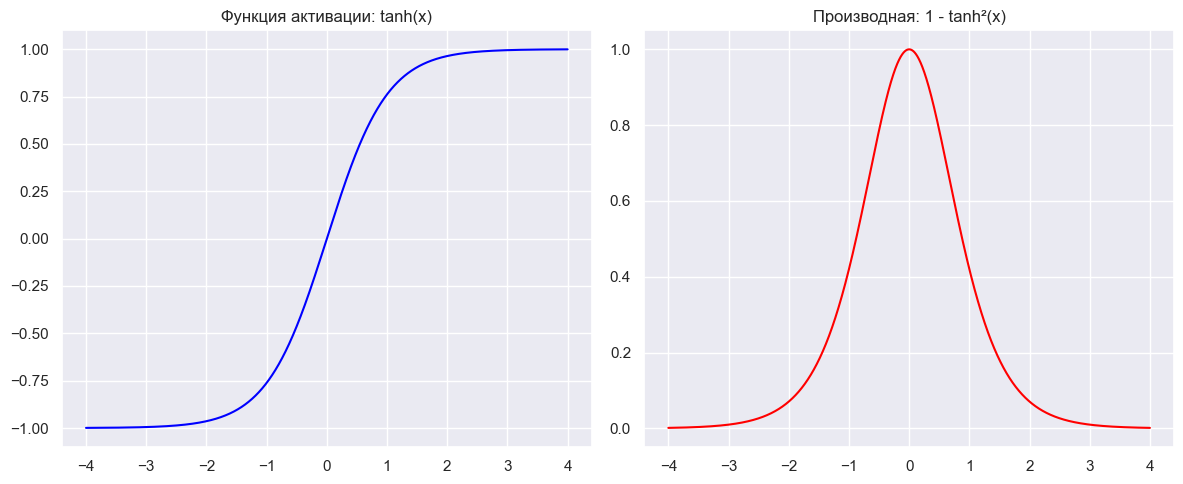

In [110]:
x = np.arange(-4, 4, 0.001)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(x, np.tanh(x), color='blue')
ax[0].set_title('Функция активации: tanh(x)')
ax[0].grid(True)

ax[1].plot(x, 1 - np.square(np.tanh(x)), color='red')
ax[1].set_title('Производная: 1 - tanh²(x)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

На основе графика проанализируйте, что будет происходить с градиентом по весам первого слоя, если нейросеть "ненулевая", иначе говоря, на промежуточных слоях может выдавать различные значения, в том числе довольно большие.

Видно, что производная на больших значениях примерно равна нулю, значит, градиент уже на, например, десятом слое, вероятнее всего, будет не отличим от нуля, а у нас 99 слоев. Эта проблема называется затуханием градиента. 

**2.** Реализуйте эту нейросеть на **PyTorch**.

*Примечание.* Каждый слой должен быть инициализирован отдельно. Нельзя создавать копии уже инициализированного слоя.

In [116]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class NinetyNineLayersNet(nn.Module):
    def __init__(self, n_features, hidden_layer_size):
        super(NinetyNineLayersNet, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(n_features, hidden_layer_size))
        for i in range(97):
            self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))
            self.layers.append(nn.Tanh())

        self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))
        self.layers.append(nn.Sigmoid())
        self.out = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.out(x)

Аналогично задаче 3 попробуйте обучить эту нейросеть для классификации изображений с цифрами 0 и 1 из датасета MNIST. Скорее всего весь датасет не поместится в память, поэтому предлагается использовать случайную подвыборку (батч) размера 32 на каждом шаге обучения.

In [137]:
train_images = train_images.cpu()
train_labels = train_labels.cpu()
torch.cuda.empty_cache()
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

dataset = CustomDataset(train_images, train_labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

model = NinetyNineLayersNet(196, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(500):
    for batch_X, batch_y in dataloader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

Постройте график зависимости среднего и максимального абсолютного значения градиента по весам для каждого слоя от номера слоя.

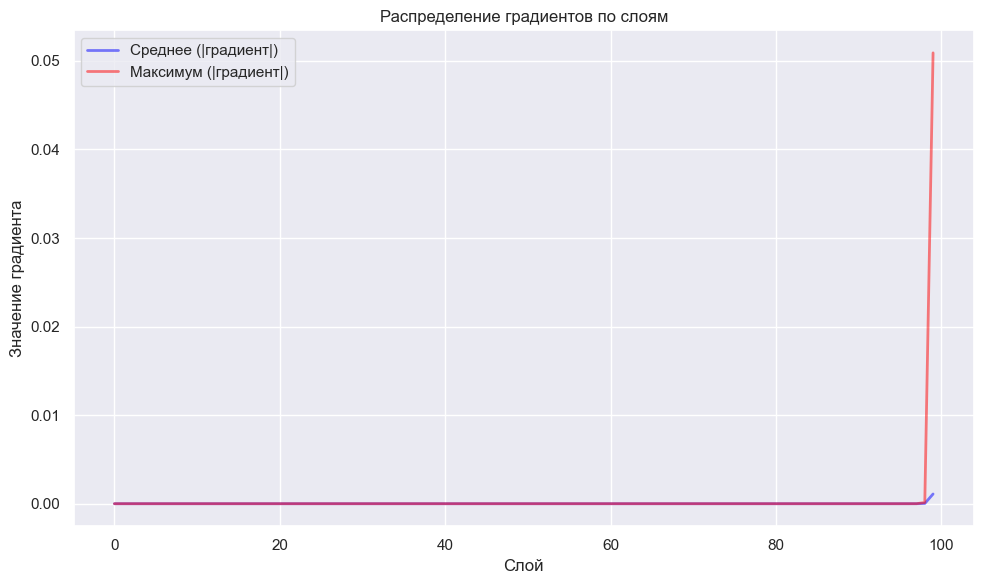

In [162]:
def plot_layer_gradients(model):
    avg_grads = []
    max_grads = []
    layers = []

    for name, param in model.named_parameters():
        if 'weight' in name and param.grad is not None:
            layers.append(name)
            avg_grads.append(param.grad.abs().mean().item())
            max_grads.append(param.grad.abs().max().item())

    plt.figure(figsize=(10, 6))

    plt.plot(avg_grads, alpha=0.5, lw=2, color='b', label='Среднее (|градиент|)')

    plt.plot(max_grads, alpha=0.5, lw=2, color='r', label='Максимум (|градиент|)')

    plt.xlabel('Слой')
    plt.ylabel('Значение градиента')
    plt.title('Распределение градиентов по слоям')
    plt.legend()
    plt.tight_layout()
    plt.show()

train_images = torch.Tensor(train_images).to(device)
train_labels = torch.Tensor(train_labels).to(device)
outputs = model(train_images)[:, 0]
loss = criterion(outputs, train_labels)
loss.backward()

plot_layer_gradients(model)

**Выводы:**

Видно, что средний градиент сразу был очень маленьким, а максимальный упал почти до нуля уже через несколько слоев. Такая нейросеть практически не будет учиться, ведь градиент примерно равен нулю.

*Примечание.* Подобная ситуация известна как "паралич" нейросети. Именно поэтому такие функции активации, как ReLU, стали очень популярными. Для преодоления этого паралича существует множество методов, многие из которых мы рассмотрим на 3 курсе.